<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/MLP_with_outliers_replaced_Mode_and_with_data_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Exploratory data analysis***

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [59]:
df.shape

(284807, 31)

In [60]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [61]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [62]:
#Splitting genuine and fraud transactions
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0]

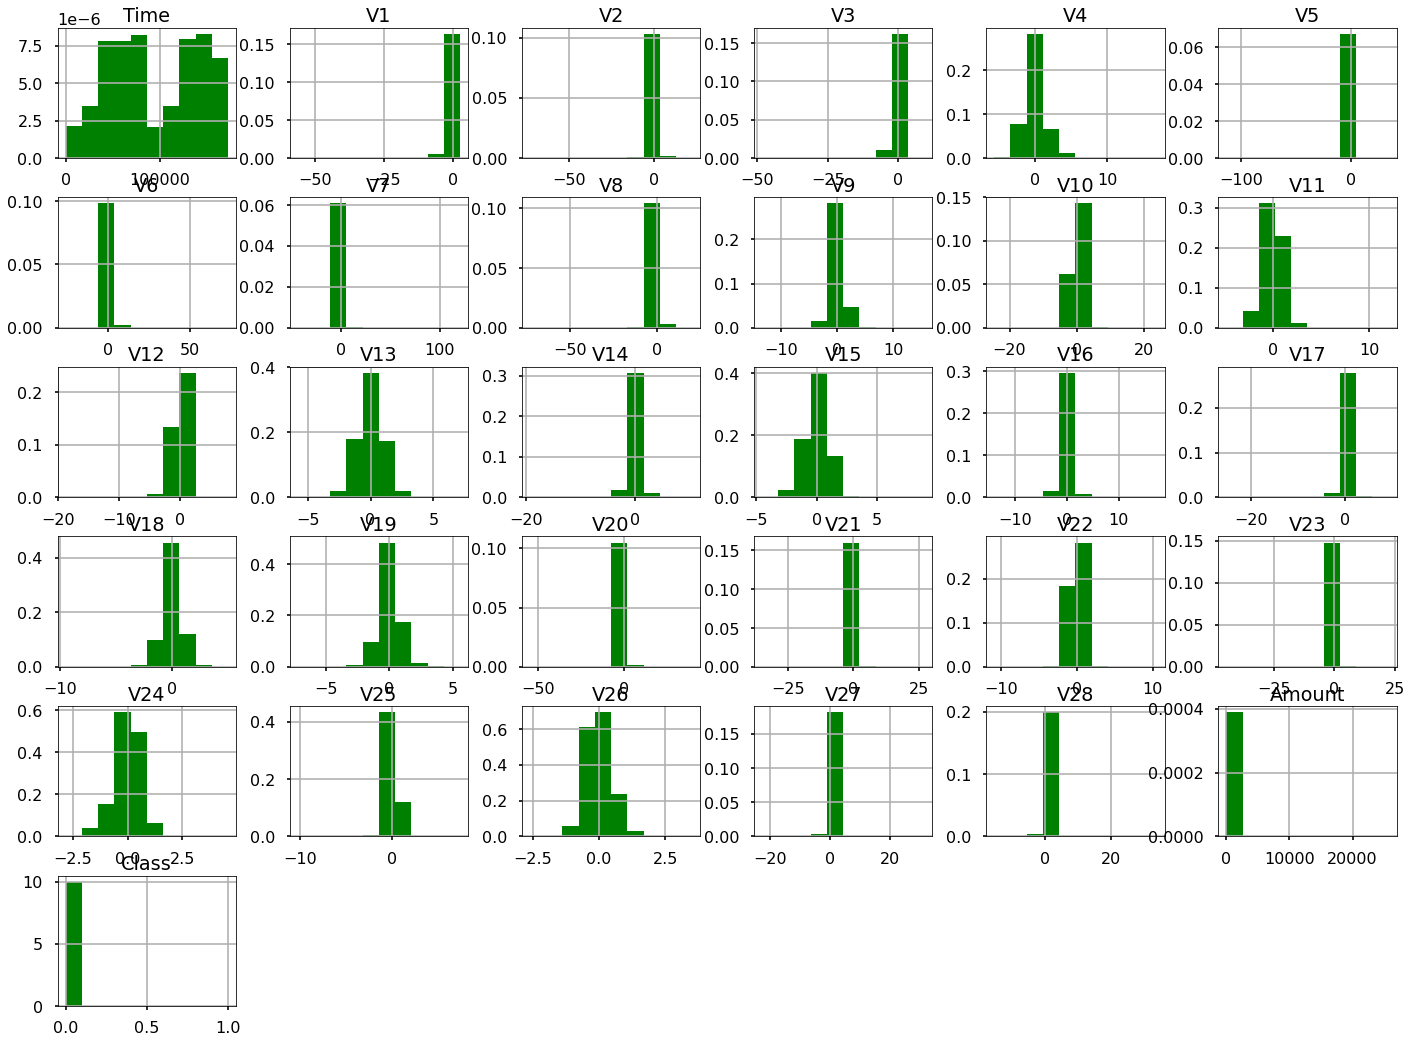

In [63]:
plt.style.use("seaborn-poster")
df.hist(figsize=(24,18),density=True,color="green")
plt.show()

In [64]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 2

In [65]:
df_non_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     28

In [66]:
#Data Balancing
df_non_fraud=df_non_fraud.sample(n=492)
df_non_fraud.head()
df_non_fraud.shape
df_non_fraud.info()

# New Balanced data set with frand and genuine txns 
dfb=df_non_fraud.append(df_fraud)
dfb.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 129641 to 149217
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64

(984, 31)

# ***Models with outliers replaced with Mode and balanced dataset***

In [67]:

def mode_outlier(df_in, col_name):
    mode=df_in[col_name].mode()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_out.loc[df_in[col_name] < fence_low] = np.nan
    df_out.loc[df_in[col_name] > fence_high] = np.nan
    df_out.fillna(mode,inplace=True)
    return df_out


    for i in range(1,29):
      dfb = mode_outlier(dfb,"V"+str(i))


In [68]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 129641 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [69]:
X = dfb.iloc[:, :-1]
y = dfb.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [70]:
X_train.shape

(787, 30)

In [71]:
y_train.shape

(787,)

In [72]:
y_test

81515     0
8842      1
33786     0
44223     1
241254    1
         ..
251326    0
263324    1
189118    0
55401     1
203700    1
Name: Class, Length: 197, dtype: int64

# ***Logistic Regression***

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [74]:
print(classifier.intercept_, classifier.coef_)

[-0.52544932] [[-2.69427230e-05  8.83056662e-02 -6.13533108e-03 -7.09206465e-01
   5.82881648e-01  3.30060651e-01  1.43119778e-02  1.67164227e-01
  -5.52553947e-01 -2.87781777e-01 -1.78612849e-01  2.15823683e-01
  -4.33255076e-01 -2.07762110e-01 -7.60436172e-01 -3.20616920e-01
  -2.39082762e-01 -3.30119449e-01  5.13192699e-02  6.35161680e-02
  -1.67893262e-01  1.53958782e-01  3.48012604e-01  9.42852608e-02
   3.95869018e-05 -2.78436940e-01  1.59198569e-02  4.85254674e-02
   5.37849272e-02  1.19129617e-03]]


In [75]:
pred = classifier.predict(X_train)

In [76]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9428208386277002


In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
pred_b = classifier.predict(X_test)

In [79]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.92        91
           1       0.95      0.92      0.93       106

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [80]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [81]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

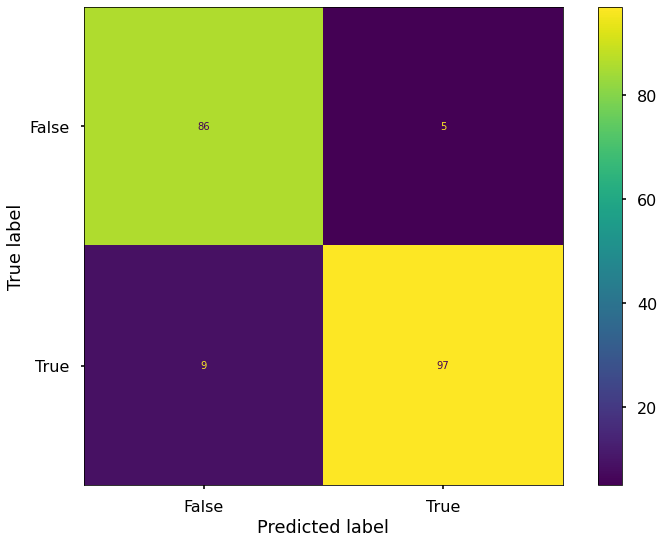

In [82]:
cm_display.plot()
plt.show()

# ***K - Nearest Neighbour***

In [83]:
classifier=KNeighborsClassifier()

In [84]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [85]:
pred = classifier.predict(X_train)

In [86]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


Accuracy from sk-learn: 0.7598475222363406


In [87]:
pred_b = classifier.predict(X_test)

In [88]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        91
           1       0.67      0.62      0.65       106

    accuracy                           0.63       197
   macro avg       0.63      0.64      0.63       197
weighted avg       0.64      0.63      0.64       197



In [89]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [90]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

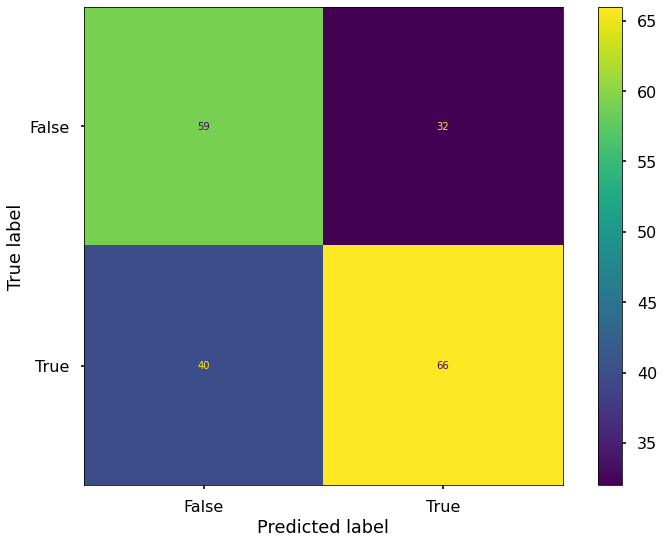

In [91]:
cm_display.plot()
plt.show()

# ***Support Vector Machine***

In [92]:
classifier=SVC()

In [93]:
classifier.fit(X_train, y_train)   

SVC()

In [94]:
pred = classifier.predict(X_train)

In [95]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.5578144853875476


In [96]:
pred_b = classifier.predict(X_test)

In [97]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.80      0.63        91
           1       0.67      0.35      0.46       106

    accuracy                           0.56       197
   macro avg       0.59      0.58      0.54       197
weighted avg       0.60      0.56      0.54       197



In [98]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [99]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

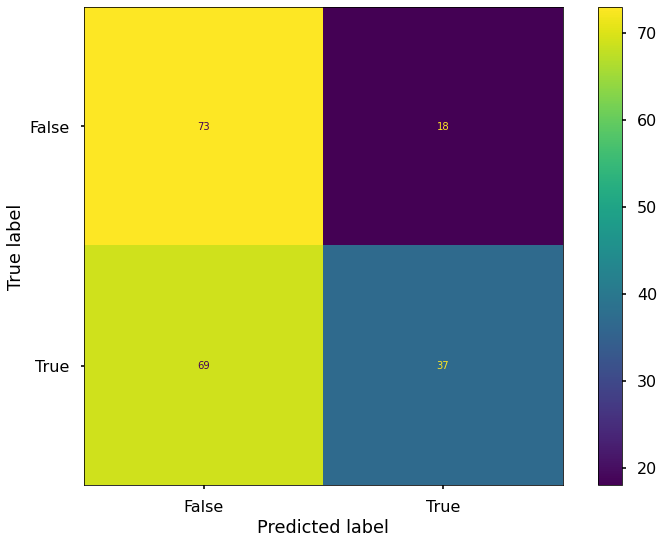

In [100]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [101]:
classifier=DecisionTreeClassifier()

In [102]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [103]:
pred = classifier.predict(X_train)

In [104]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [105]:
# print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [106]:
pred_b = classifier.predict(X_test)

In [107]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        91
           1       0.91      0.90      0.90       106

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [108]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

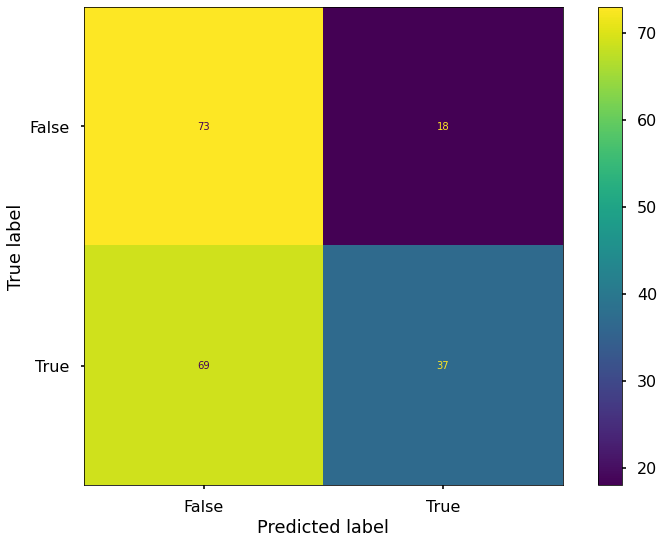

In [109]:
cm_display.plot()
plt.show()